In [ ]:
#basic statistics 2

In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [7]:
# Sample data
data = [1.13, 1.55, 1.43, 0.92, 1.25, 1.36, 1.32, 0.85, 1.07, 1.48, 1.20, 1.33, 1.18, 1.22, 1.29]
n = len(data)

In [8]:
# Calculate sample mean and standard deviation
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1) 

In [9]:
confidence_level = 0.99
alpha = 1 - confidence_level

In [10]:
df = n - 1
t_critical = stats.t.ppf(1 - alpha/2, df)
margin_error_t = t_critical * (sample_std / np.sqrt(n))
ci_t = (sample_mean - margin_error_t, sample_mean + margin_error_t)

In [11]:
pop_std = 0.2 
z_critical = stats.norm.ppf(1 - alpha/2)
margin_error_z = z_critical * (pop_std / np.sqrt(n))
ci_z = (sample_mean - margin_error_z, sample_mean + margin_error_z)

In [12]:
# Print the results
print("Sample Mean:", round(sample_mean, 4))
print("Sample Std Dev:", round(sample_std, 4))
print("\nCase A (t-distribution):")
print(f"t-critical = {round(t_critical, 4)}")
print(f"99% CI = {ci_t}")
print("\nCase B (z-distribution):")
print(f"z-critical = {round(z_critical, 4)}")
print(f"99% CI = {ci_z}")

Sample Mean: 1.2387
Sample Std Dev: 0.1932

Case A (t-distribution):
t-critical = 2.9768
99% CI = (np.float64(1.0901973384384906), np.float64(1.3871359948948425))

Case B (z-distribution):
z-critical = 2.5758
99% CI = (np.float64(1.1056514133957607), np.float64(1.3716819199375725))


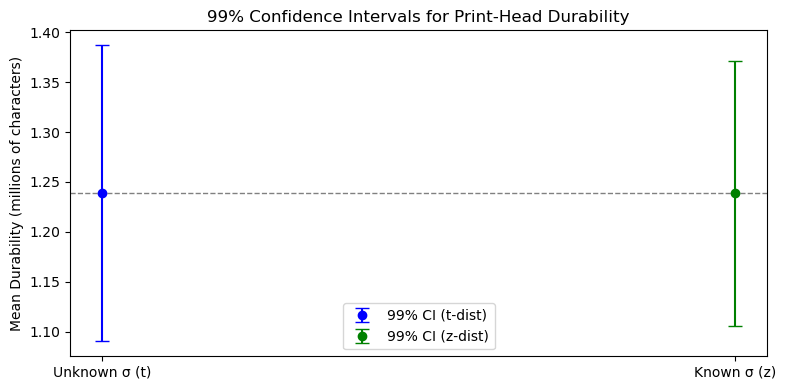

In [13]:
plt.figure(figsize=(8, 4))
plt.errorbar(1, sample_mean, yerr=margin_error_t, fmt='o', color='blue', capsize=5, label='99% CI (t-dist)')
plt.errorbar(2, sample_mean, yerr=margin_error_z, fmt='o', color='green', capsize=5, label='99% CI (z-dist)')
plt.axhline(sample_mean, color='gray', linestyle='--', linewidth=1)
plt.xticks([1, 2], ['Unknown σ (t)', 'Known σ (z)'])
plt.ylabel('Mean Durability (millions of characters)')
plt.title('99% Confidence Intervals for Print-Head Durability')
plt.legend()
plt.tight_layout()
plt.show()